<a href="https://colab.research.google.com/github/arghya53/TimeSeriesAnalysis/blob/main/TimeSeriesDataanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install download

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
%matplotlib inline

In [ ]:
from download import download
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

In [ ]:
path = download('https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip', '/tmp/aq', kind="zip")

Replace is False and data exists, so doing nothing. Use replace=True to re-download the data.


In [ ]:
 df = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', encoding='ISO-8859-1')

In [ ]:
df.head()

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  3.0  NaN  200.0  82.0  -2.3   
1   2  2013      3    1     1    7.0   7.0  3.0  NaN  200.0  80.0  -2.5   
2   3  2013      3    1     2    5.0   5.0  3.0  2.0  200.0  79.0  -3.0   
3   4  2013      3    1     3    6.0   6.0  3.0  NaN  200.0  79.0  -3.6   
4   5  2013      3    1     4    5.0   5.0  3.0  NaN  200.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM   station  
0  1020.8 -19.7   0.0    E   0.5  Dingling  
1  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4  1022.3 -19.4   0.0    N   2.1  Dingling

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
def convert_to_date(year, month, day, hour):
  return datetime(int(year), int(month), int(day), int(hour))

In [ ]:
ag_df = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv',
                   parse_dates={'datetime': ['year', 'month', 'day', 'hour']},
                   date_parser=convert_to_date, keep_date_col=True)

<ipython-input-196-ebd0484953d8>:1: FutureWarning: 
        Use pd.to_datetime instead.

  ag_df = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv',


In [ ]:
ag_df.head()

datetime  No  year month day hour  PM2.5  PM10  SO2  NO2     CO  \
0 2013-03-01 00:00:00   1  2013     3   1    0    4.0   4.0  3.0  NaN  200.0   
1 2013-03-01 01:00:00   2  2013     3   1    1    7.0   7.0  3.0  NaN  200.0   
2 2013-03-01 02:00:00   3  2013     3   1    2    5.0   5.0  3.0  2.0  200.0   
3 2013-03-01 03:00:00   4  2013     3   1    3    6.0   6.0  3.0  NaN  200.0   
4 2013-03-01 04:00:00   5  2013     3   1    4    5.0   5.0  3.0  NaN  200.0   

     O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
0  82.0  -2.3  1020.8 -19.7   0.0    E   0.5  Dingling  
1  80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2  79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3  79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4  81.0  -3.5  1022.3 -19.4   0.0    N   2.1  Dingling

In [ ]:
ag_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  35064 non-null  datetime64[ns]
 1   No        35064 non-null  int64         
 2   year      35064 non-null  object        
 3   month     35064 non-null  object        
 4   day       35064 non-null  object        
 5   hour      35064 non-null  object        
 6   PM2.5     34285 non-null  float64       
 7   PM10      34408 non-null  float64       
 8   SO2       34334 non-null  float64       
 9   NO2       33830 non-null  float64       
 10  CO        33052 non-null  float64       
 11  O3        33850 non-null  float64       
 12  TEMP      35011 non-null  float64       
 13  PRES      35014 non-null  float64       
 14  DEWP      35011 non-null  float64       
 15  RAIN      35013 non-null  float64       
 16  wd        34924 non-null  object        
 17  WSPM      35

In [ ]:
ag_df['month']=ag_df['month'].astype(int)

In [ ]:
ag_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  35064 non-null  datetime64[ns]
 1   No        35064 non-null  int64         
 2   year      35064 non-null  object        
 3   month     35064 non-null  int64         
 4   day       35064 non-null  object        
 5   hour      35064 non-null  object        
 6   PM2.5     34285 non-null  float64       
 7   PM10      34408 non-null  float64       
 8   SO2       34334 non-null  float64       
 9   NO2       33830 non-null  float64       
 10  CO        33052 non-null  float64       
 11  O3        33850 non-null  float64       
 12  TEMP      35011 non-null  float64       
 13  PRES      35014 non-null  float64       
 14  DEWP      35011 non-null  float64       
 15  RAIN      35013 non-null  float64       
 16  wd        34924 non-null  object        
 17  WSPM      35

In [ ]:
ag_df.shape

(35064, 19)

In [ ]:
ag_df.columns.tolist()

['datetime',
 'No',
 'year',
 'month',
 'day',
 'hour',
 'PM2.5',
 'PM10',
 'SO2',
 'NO2',
 'CO',
 'O3',
 'TEMP',
 'PRES',
 'DEWP',
 'RAIN',
 'wd',
 'WSPM',
 'station']

In [ ]:
ag_df.isnull().any()

datetime    False
No          False
year        False
month       False
day         False
hour        False
PM2.5        True
PM10         True
SO2          True
NO2          True
CO           True
O3           True
TEMP         True
PRES         True
DEWP         True
RAIN         True
wd           True
WSPM         True
station     False
dtype: bool

In [ ]:
ag_df.nunique()

datetime    35064
No          35064
year            5
month          12
day            31
hour           24
PM2.5         486
PM10          554
SO2           327
NO2           636
CO            103
O3            792
TEMP          998
PRES          593
DEWP          602
RAIN          116
wd             16
WSPM           95
station         1
dtype: int64

In [ ]:
ag_df.describe()

No         month         PM2.5          PM10           SO2  \
count  35064.000000  35064.000000  34285.000000  34408.000000  34334.000000   
mean   17532.500000      6.522930     65.989497     83.739723     11.749650   
std    10122.249256      3.448752     72.267723     79.541685     15.519259   
min        1.000000      1.000000      3.000000      2.000000      0.285600   
25%     8766.750000      4.000000     14.000000     26.000000      2.000000   
50%    17532.500000      7.000000     41.000000     60.000000      5.000000   
75%    26298.250000     10.000000     93.000000    117.000000     15.000000   
max    35064.000000     12.000000    881.000000    905.000000    156.000000   

                NO2            CO            O3          TEMP          PRES  \
count  33830.000000  33052.000000  33850.000000  35011.000000  35014.000000   
mean      27.585467    904.896073     68.548371     13.686111   1007.760278   
std       26.383882    903.306220     53.764424     11.365313     10.225664   
min        1.026500    100.000000      0.214200    -16.600000    982.400000   
25%        9.000000    300.000000     31.000000      3.400000    999.300000   
50%       19.000000    600.000000     61.000000     14.700000   1007.400000   
75%       38.000000   1200.000000     90.000000     23.300000   1016.000000   
max      205.000000  10000.000000    500.000000     41.400000   1036.500000   

               DEWP          RAIN          WSPM  
count  35011.000000  35013.000000  35021.000000  
mean       1.505495      0.060366      1.853836  
std       13.822099      0.752899      1.309808  
min      -35.100000      0.000000      0.000000  
25%      -10.200000      0.000000      1.000000  
50%        1.800000      0.000000      1.500000  
75%       14.200000      0.000000      2.300000  
max       27.200000     52.100000     10.000000

In [ ]:
import plotly.express as px
fig = px.line(ag_df, x='datetime', y='PM2.5', title='PM2.5 with slider')
fig.update_xaxes(rangeslider_visible = True)
fig.show()


In [ ]:
fig = px.line(ag_df, x='datetime', y='PM2.5', title='PM2.5 with Slider')

fig.update_xaxes(
        rangeslider_visible=True,
        rangeselector=dict(
          buttons=list([
          dict(count=1, label='1y', step='year', stepmode='backward'),
          dict(count=2, label='2y', step='year', stepmode='backward'),
          dict(count=3, label='3y', step='year', stepmode='backward'),
          dict(step='all')
       ])
   )
)
fig.show()

In [ ]:
ag_df = ag_df.set_index('datetime')

In [ ]:
ag_df.index

DatetimeIndex(['2013-03-01 00:00:00', '2013-03-01 01:00:00',
               '2013-03-01 02:00:00', '2013-03-01 03:00:00',
               '2013-03-01 04:00:00', '2013-03-01 05:00:00',
               '2013-03-01 06:00:00', '2013-03-01 07:00:00',
               '2013-03-01 08:00:00', '2013-03-01 09:00:00',
               ...
               '2017-02-28 14:00:00', '2017-02-28 15:00:00',
               '2017-02-28 16:00:00', '2017-02-28 17:00:00',
               '2017-02-28 18:00:00', '2017-02-28 19:00:00',
               '2017-02-28 20:00:00', '2017-02-28 21:00:00',
               '2017-02-28 22:00:00', '2017-02-28 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=35064, freq=None)

In [ ]:
# as we have done indexing in the previous cell, we can now have the data quite easily
ag_df.loc['2013':'2015']

No  year month day hour  PM2.5   PM10   SO2   NO2  \
datetime                                                                    
2013-03-01 00:00:00      1  2013     3   1    0    4.0    4.0   3.0   NaN   
2013-03-01 01:00:00      2  2013     3   1    1    7.0    7.0   3.0   NaN   
2013-03-01 02:00:00      3  2013     3   1    2    5.0    5.0   3.0   2.0   
2013-03-01 03:00:00      4  2013     3   1    3    6.0    6.0   3.0   NaN   
2013-03-01 04:00:00      5  2013     3   1    4    5.0    5.0   3.0   NaN   
...                    ...   ...   ...  ..  ...    ...    ...   ...   ...   
2015-12-31 19:00:00  24860  2015    12  31   19   85.0   95.0  12.0  73.0   
2015-12-31 20:00:00  24861  2015    12  31   20    NaN  109.0  32.0  79.0   
2015-12-31 21:00:00  24862  2015    12  31   21   80.0  100.0  35.0  81.0   
2015-12-31 22:00:00  24863  2015    12  31   22   93.0   93.0  28.0  76.0   
2015-12-31 23:00:00  24864  2015    12  31   23   98.0   98.0  25.0  75.0   

                         CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  \
datetime                                                                 
2013-03-01 00:00:00   200.0  82.0  -2.3  1020.8 -19.7   0.0    E   0.5   
2013-03-01 01:00:00   200.0  80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7   
2013-03-01 02:00:00   200.0  79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2   
2013-03-01 03:00:00   200.0  79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0   
2013-03-01 04:00:00   200.0  81.0  -3.5  1022.3 -19.4   0.0    N   2.1   
...                     ...   ...   ...     ...   ...   ...  ...   ...   
2015-12-31 19:00:00  1200.0   2.0  -0.6  1021.0  -9.5   0.0   NE   0.6   
2015-12-31 20:00:00  2900.0   2.0  -1.8  1021.2  -9.9   0.0   NW   1.1   
2015-12-31 21:00:00  3200.0   2.0  -1.6  1020.8  -9.7   0.0   NE   0.9   
2015-12-31 22:00:00  3500.0   2.0  -2.9  1020.4  -9.8   0.0  NNW   1.3   
2015-12-31 23:00:00  3600.0   2.0  -3.5  1020.2  -9.7   0.0  NNW   1.3   

                      station  
datetime                       
2013-03-01 00:00:00  Dingling  
2013-03-01 01:00:00  Dingling  
2013-03-01 02:00:00  Dingling  
2013-03-01 03:00:00  Dingling  
2013-03-01 04:00:00  Dingling  
...                       ...  
2015-12-31 19:00:00  Dingling  
2015-12-31 20:00:00  Dingling  
2015-12-31 21:00:00  Dingling  
2015-12-31 22:00:00  Dingling  
2015-12-31 23:00:00  Dingling  

[24864 rows x 18 columns]

In [ ]:
pm_data= ag_df['PM2.5']
pm_data.head()

datetime
2013-03-01 00:00:00    4.0
2013-03-01 01:00:00    7.0
2013-03-01 02:00:00    5.0
2013-03-01 03:00:00    6.0
2013-03-01 04:00:00    5.0
Name: PM2.5, dtype: float64

<Axes: xlabel='datetime'>

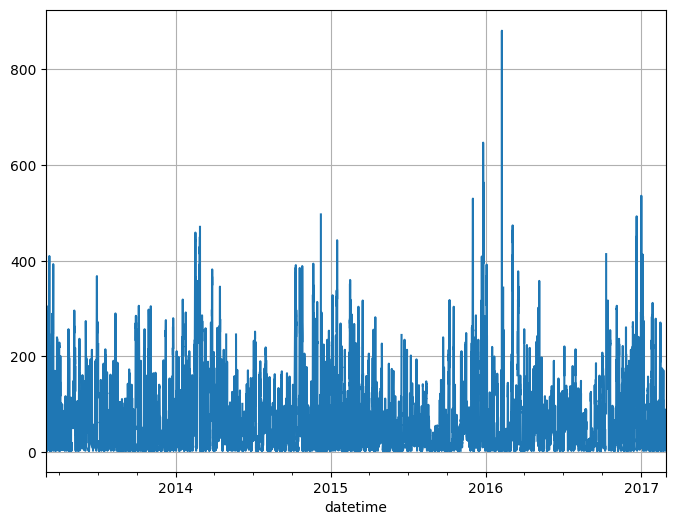

In [ ]:
pm_data.plot(grid=True)

<ipython-input-209-fb4c5828f2c9>:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



<Axes: xlabel='datetime'>

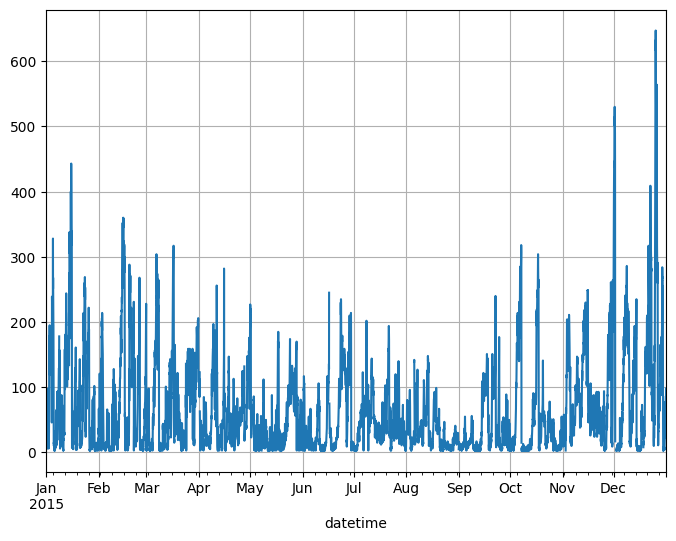

In [ ]:
ag_df_2015=ag_df['2015']
pm_data_2015=ag_df_2015['PM2.5']
pm_data_2015.plot(grid=True)

<ipython-input-210-792ea6859958>:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



<Axes: xlabel='datetime'>

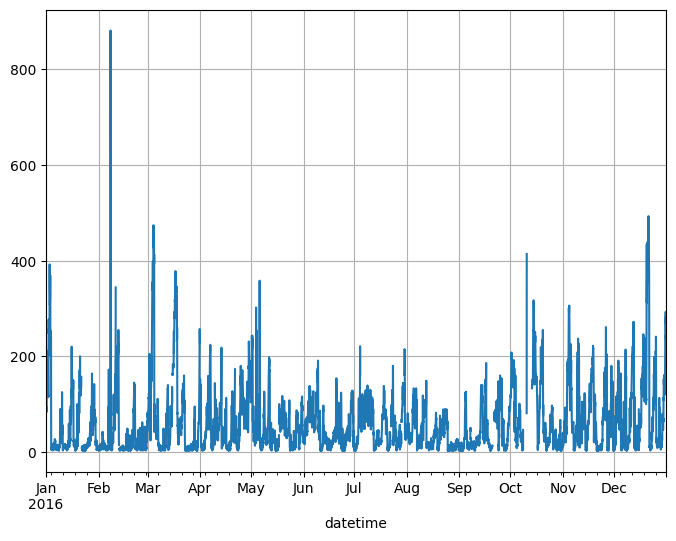

In [ ]:
ag_df_2016 = ag_df['2016']
pm_data_2016 = ag_df_2016['PM2.5']
pm_data_2016.plot(grid=True)

In [ ]:
ag_df_non_indexed = ag_df.copy()

In [ ]:
ag_df_non_indexed.head()

No  year  month day hour  PM2.5  PM10  SO2  NO2     CO  \
datetime                                                                      
2013-03-01 00:00:00   1  2013      3   1    0    4.0   4.0  3.0  NaN  200.0   
2013-03-01 01:00:00   2  2013      3   1    1    7.0   7.0  3.0  NaN  200.0   
2013-03-01 02:00:00   3  2013      3   1    2    5.0   5.0  3.0  2.0  200.0   
2013-03-01 03:00:00   4  2013      3   1    3    6.0   6.0  3.0  NaN  200.0   
2013-03-01 04:00:00   5  2013      3   1    4    5.0   5.0  3.0  NaN  200.0   

                       O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
datetime                                                                  
2013-03-01 00:00:00  82.0  -2.3  1020.8 -19.7   0.0    E   0.5  Dingling  
2013-03-01 01:00:00  80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2013-03-01 02:00:00  79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2  Dingling  
2013-03-01 03:00:00  79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0  Dingling  
2013-03-01 04:00:00  81.0  -3.5  1022.3 -19.4   0.0    N   2.1  Dingling

In [ ]:
ag_df_non_indexed.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

<ipython-input-211-9c75dc40cb30>:3: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

<ipython-input-211-9c75dc40cb30>:4: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



Text(0.5, 1.0, 'Air quality plot for the year 2014 and 2015')

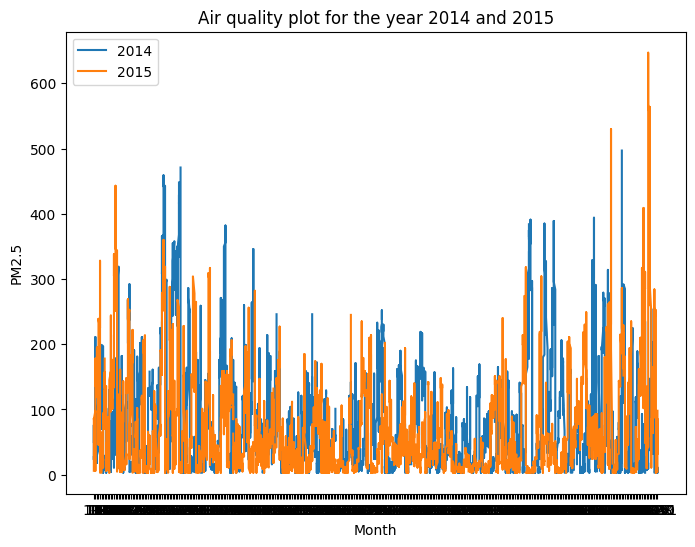

In [ ]:
# overlaying the graph one-another

df_2014 = ag_df['2014'].reset_index()
df_2015 = ag_df['2015'].reset_index()
df_2014['month_day_hour']=df_2014.apply(lambda x: str(x['month'])+ "-" +x['day'], axis=1)
df_2015['month_day_hour']=df_2015.apply(lambda x: str(x['month'])+ "-" +x['day'], axis=1)
plt.plot(df_2014['month_day_hour'], df_2014['PM2.5'])
plt.plot(df_2015['month_day_hour'], df_2015['PM2.5'])
plt.legend(['2014', '2015'])
plt.xlabel('Month')
plt.ylabel('PM2.5')
plt.title('Air quality plot for the year 2014 and 2015')

In [ ]:
# Univariate analysis
ag_df['2014':'2016'][['month', 'PM2.5']].groupby('month').describe()

PM2.5                                                       
        count       mean         std  min   25%   50%     75%    max
month                                                               
1      2173.0  70.285274   75.913587  3.0  12.0  38.0  113.00  443.0
10     2081.0  82.586257   92.234361  3.0  13.0  43.0  124.00  414.0
11     2141.0  77.500140   71.720648  3.0  20.0  56.0  112.00  394.0
12     2186.0  87.990851  104.677021  3.0  11.0  48.5  135.00  647.0
2      1978.0  86.389282  105.603069  3.0  10.0  33.0  132.00  881.0
3      2212.0  80.193852   87.889440  3.0  13.0  47.0  123.25  474.0
4      2105.0  67.963325   56.430235  3.0  25.0  54.0   95.00  346.0
5      2188.0  47.994378   44.843130  3.0  16.0  35.0   67.00  358.0
6      2119.0  46.655403   43.877349  3.0  13.0  31.0   69.00  245.0
7      2205.0  61.671474   50.926149  3.0  21.0  48.0   91.00  252.0
8      2206.0  41.364869   37.279312  3.0  13.0  29.0   60.00  217.0
9      2074.0  45.356123   43.235331  3.0  11.0  27.0   78.00  240.0

In [ ]:
# Bivariate analysis
ag_df['2014':'2016'][['month', 'PM2.5', 'TEMP']].groupby('month').agg({'PM2.5':['max'], 'TEMP':['min', 'max']})

PM2.5  TEMP      
         max   min   max
month                   
1      443.0 -16.6  12.4
10     414.0  -1.4  28.1
11     394.0 -10.3  20.8
12     647.0  -9.7  11.6
2      881.0 -10.9  14.0
3      474.0  -6.4  26.0
4      346.0   1.3  32.0
5      358.0   7.0  41.4
6      245.0  15.1  38.1
7      252.0  16.8  39.2
8      217.0  16.6  36.3
9      240.0   7.8  34.5

<ipython-input-214-512198145e3d>:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



array([<Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>], dtype=object)

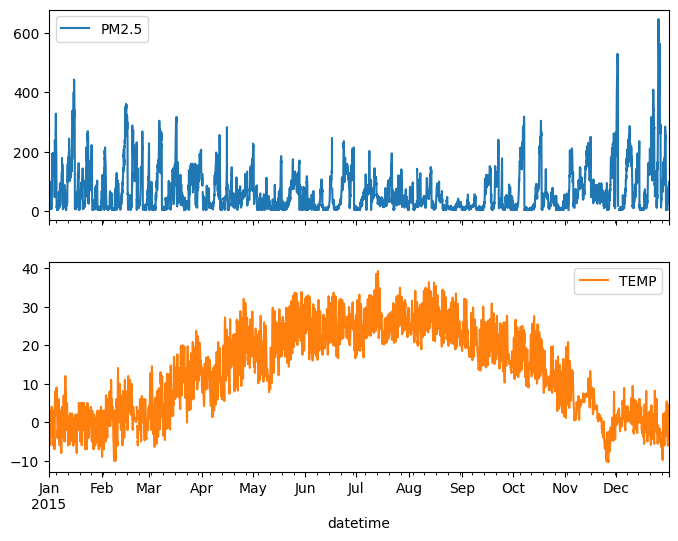

In [ ]:
ag_df_2015 = ag_df['2015']
pm_data_2015 = ag_df_2015[['PM2.5', 'TEMP']]
pm_data_2015.plot(subplots=True)

array([[<Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'TEMP'}>]], dtype=object)

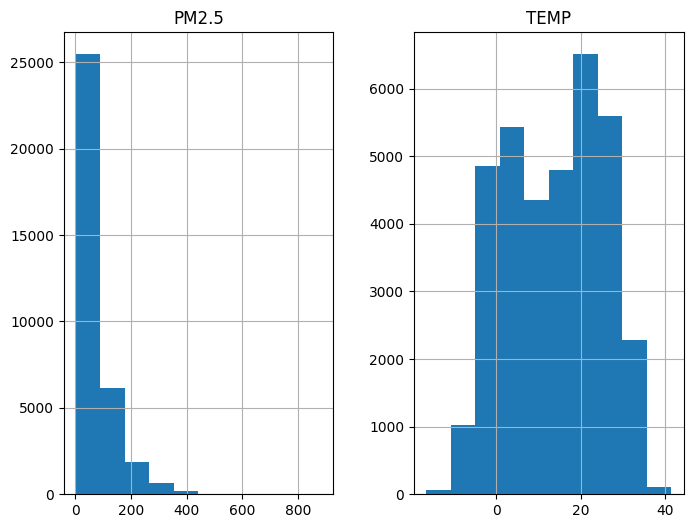

In [ ]:
ag_df[['PM2.5', 'TEMP']].hist()

<Axes: ylabel='Density'>

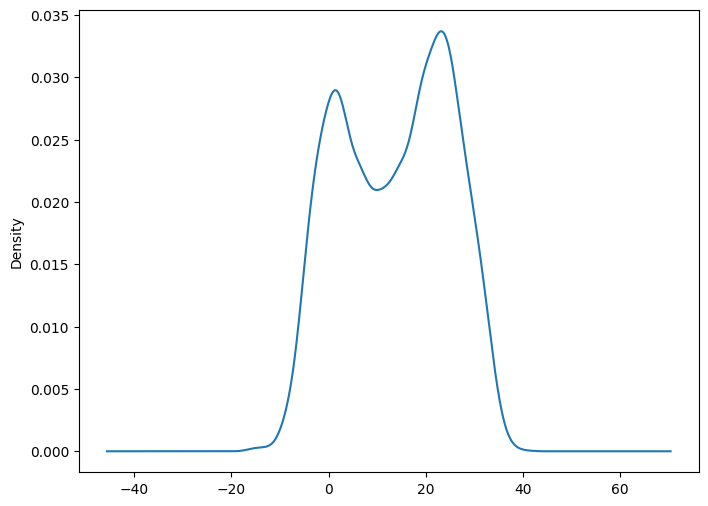

In [ ]:
# Kernel Density estimation showing bimodal distribution
ag_df['TEMP'].plot(kind = 'density')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

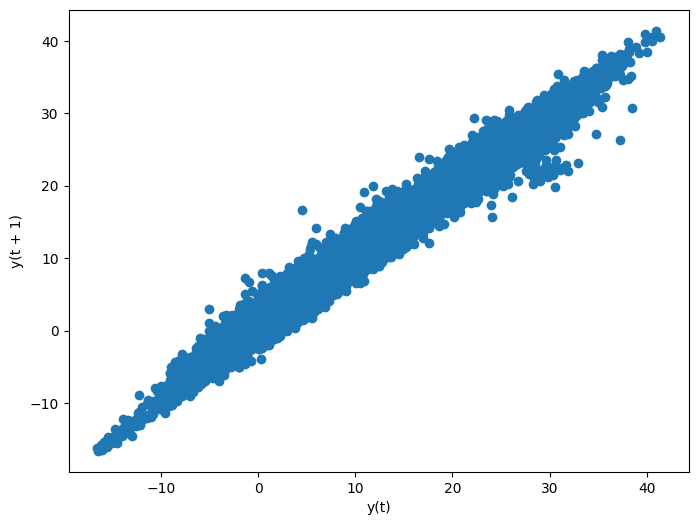

In [ ]:
# to predict the future data we take one hour lag so it becomes linear
# x-axis is the current time and y-axis is the lag period
# it is called 1st order lag plot
pd.plotting.lag_plot(ag_df['TEMP'], lag=1)

<Axes: xlabel='y(t)', ylabel='y(t + 10)'>

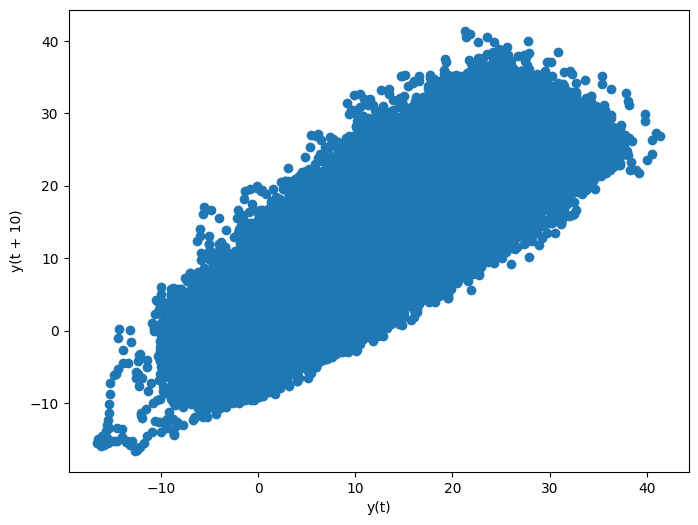

In [ ]:
pd.plotting.lag_plot(ag_df['TEMP'], lag=10)

<Axes: xlabel='y(t)', ylabel='y(t + 24)'>

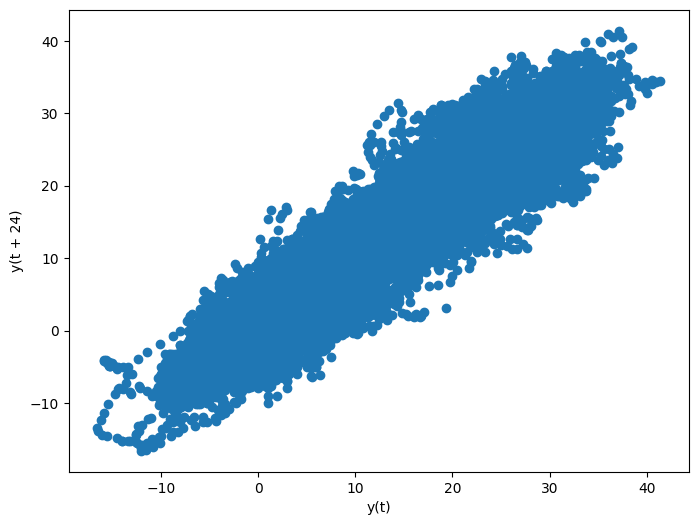

In [ ]:
pd.plotting.lag_plot(ag_df['TEMP'], lag=24)

<Axes: xlabel='y(t)', ylabel='y(t + 8640)'>

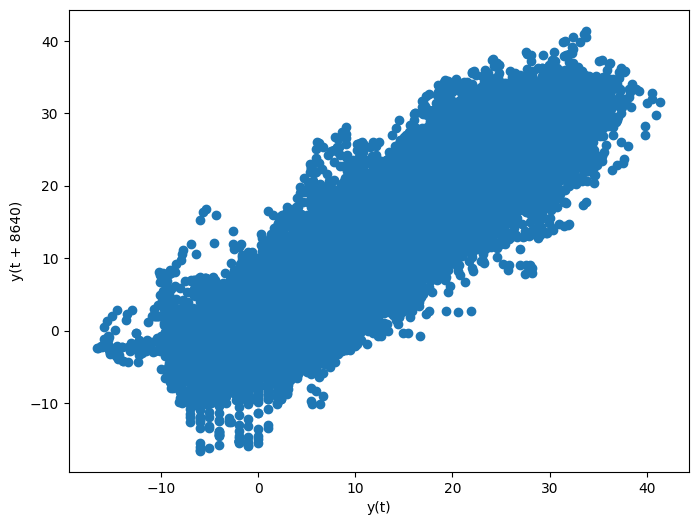

In [ ]:
pd.plotting.lag_plot(ag_df['TEMP'], lag=8640)

<Axes: xlabel='y(t)', ylabel='y(t + 8640)'>

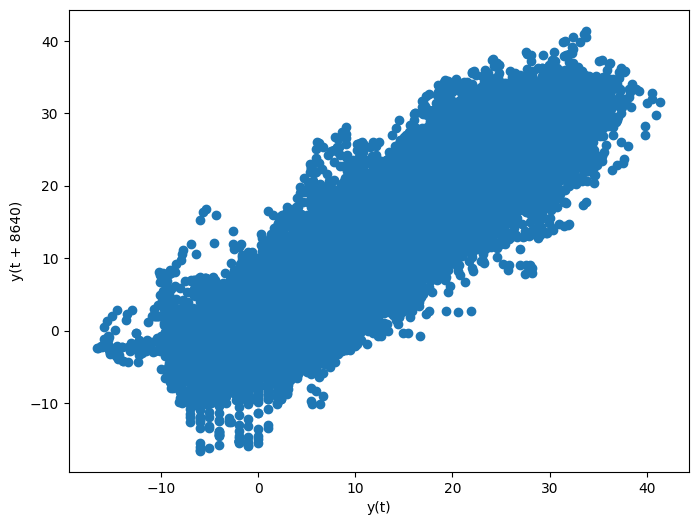

In [ ]:
pd.plotting.lag_plot(ag_df['TEMP'], lag=8640) # one year lag

<Axes: xlabel='y(t)', ylabel='y(t + 4320)'>

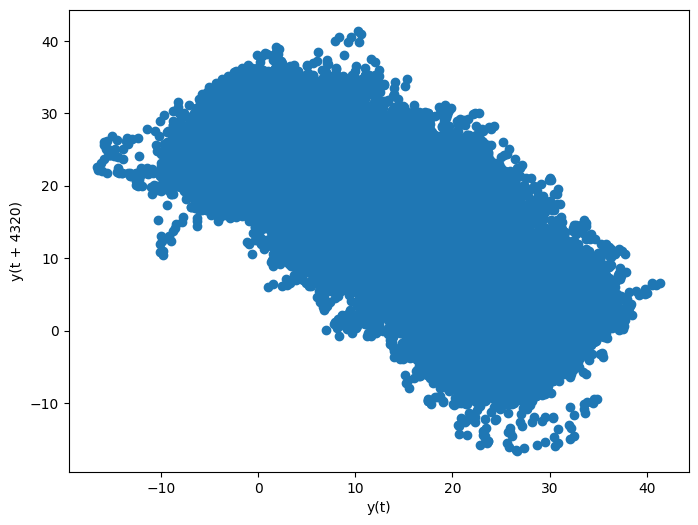

In [ ]:
pd.plotting.lag_plot(ag_df['TEMP'], lag=4320) # summer temp and winter temp neg correlation

<Axes: xlabel='y(t)', ylabel='y(t + 2150)'>

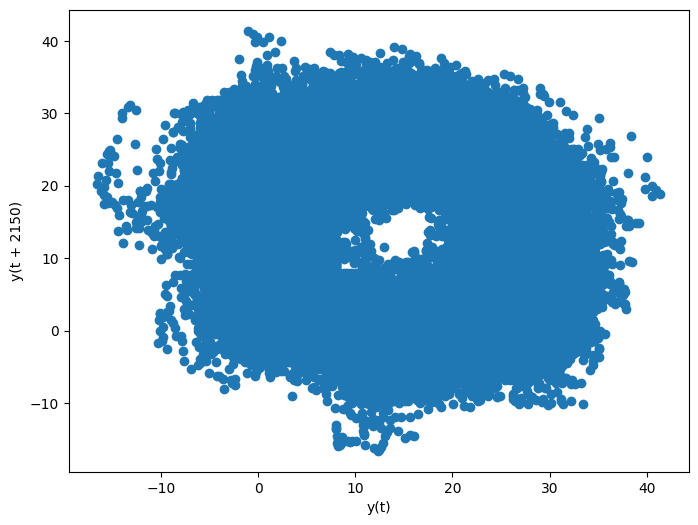

In [ ]:
pd.plotting.lag_plot(ag_df['TEMP'], lag=2150) # within 3 months we can see there is no correlation

<ipython-input-224-5d46960e975a>:2: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



array([<Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>], dtype=object)

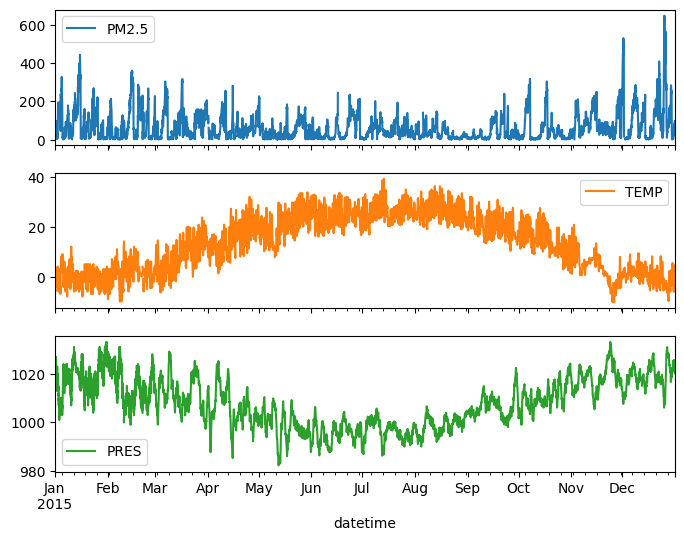

In [ ]:
# Multivariate analysis
ag_df_2015 = ag_df['2015']
pm_data_2015 = ag_df_2015[['PM2.5', 'TEMP', 'PRES']]
pm_data_2015.plot(subplots=True)

array([<Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>], dtype=object)

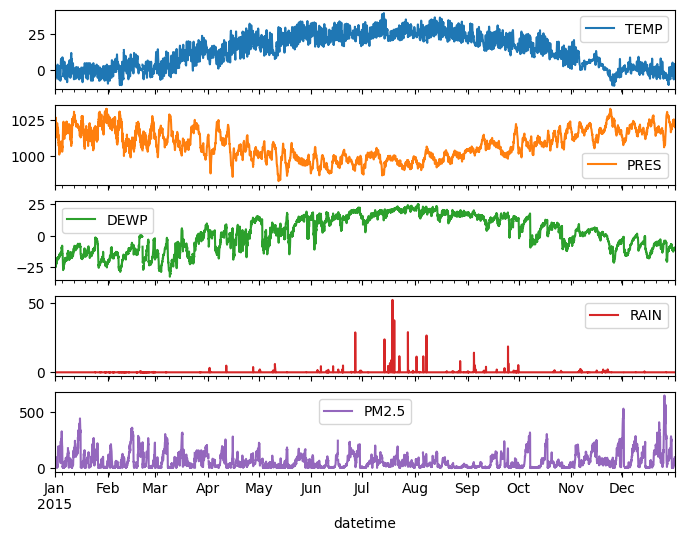

In [ ]:
multi_data = ag_df_2015[['TEMP', 'PRES', 'DEWP', 'RAIN', 'PM2.5']]
multi_data.plot(subplots=True)

array([<Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>], dtype=object)

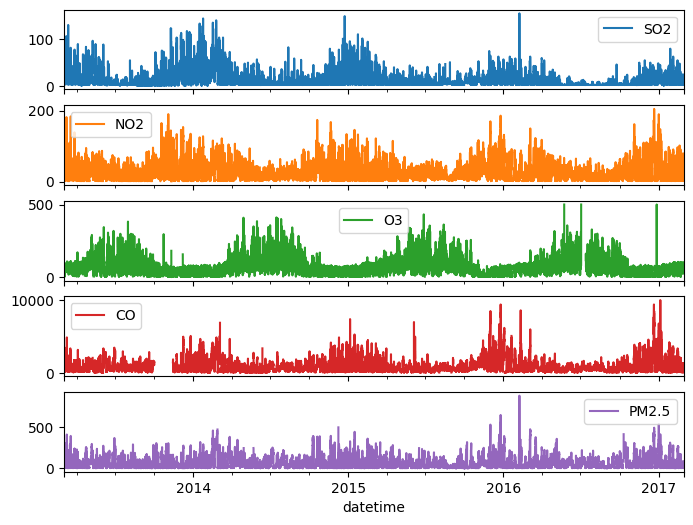

In [ ]:
multi_data = ag_df[['SO2', 'NO2', 'O3', 'CO', 'PM2.5']]
multi_data.plot(subplots=True)

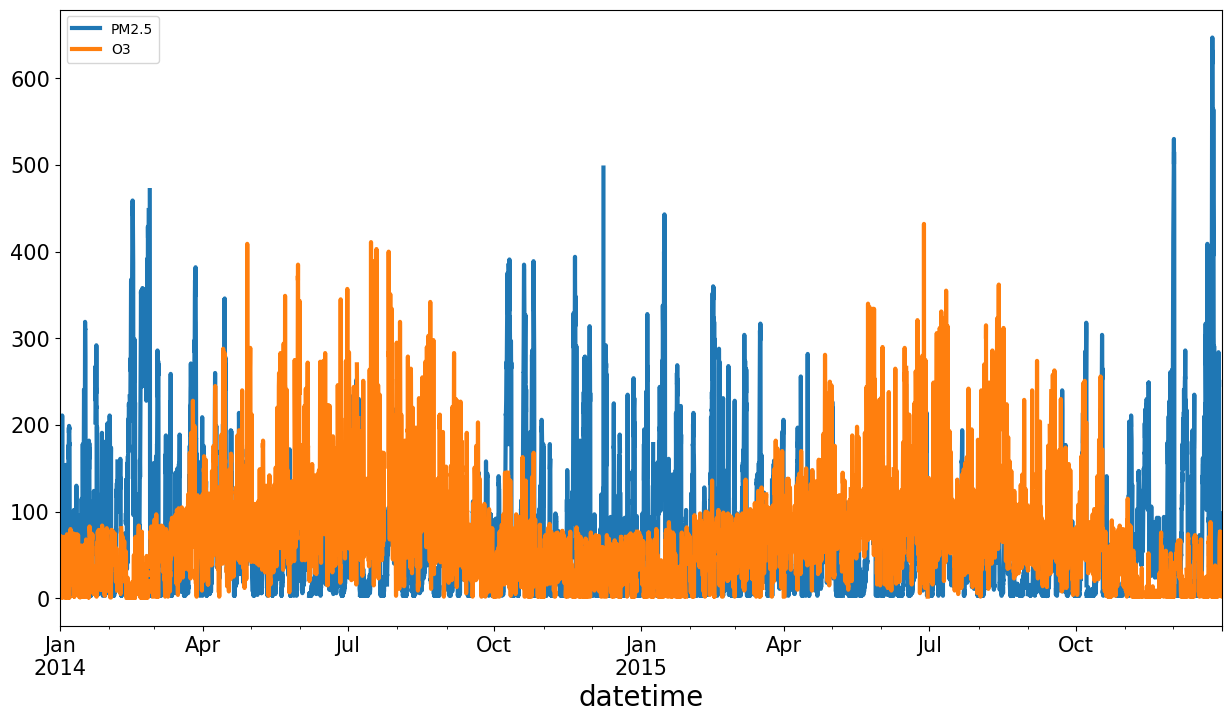

In [ ]:
ag_df['2014':'2015'][['PM2.5', 'O3']].plot(figsize=(15,8), linewidth=3, fontsize=15)
plt.xlabel('datetime', fontsize=20);

In [ ]:
ag_df_2015['PM2.5']

datetime
2015-01-01 00:00:00     NaN
2015-01-01 01:00:00     NaN
2015-01-01 02:00:00     NaN
2015-01-01 03:00:00     NaN
2015-01-01 04:00:00     NaN
                       ... 
2015-12-31 19:00:00    85.0
2015-12-31 20:00:00     NaN
2015-12-31 21:00:00    80.0
2015-12-31 22:00:00    93.0
2015-12-31 23:00:00    98.0
Name: PM2.5, Length: 8760, dtype: float64

In [ ]:
ag_df_2015['PM2.5']

datetime
2015-01-01 00:00:00     NaN
2015-01-01 01:00:00     NaN
2015-01-01 02:00:00     NaN
2015-01-01 03:00:00     NaN
2015-01-01 04:00:00     NaN
                       ... 
2015-12-31 19:00:00    85.0
2015-12-31 20:00:00     NaN
2015-12-31 21:00:00    80.0
2015-12-31 22:00:00    93.0
2015-12-31 23:00:00    98.0
Name: PM2.5, Length: 8760, dtype: float64

In [ ]:
ag_df_2015

No  year month day hour  PM2.5   PM10   SO2   NO2  \
datetime                                                                    
2015-01-01 00:00:00  16105  2015     1   1    0    NaN    NaN   NaN   NaN   
2015-01-01 01:00:00  16106  2015     1   1    1    NaN    NaN   NaN   NaN   
2015-01-01 02:00:00  16107  2015     1   1    2    NaN    NaN   NaN   NaN   
2015-01-01 03:00:00  16108  2015     1   1    3    NaN    NaN   NaN   NaN   
2015-01-01 04:00:00  16109  2015     1   1    4    NaN    NaN   NaN   NaN   
...                    ...   ...   ...  ..  ...    ...    ...   ...   ...   
2015-12-31 19:00:00  24860  2015    12  31   19   85.0   95.0  12.0  73.0   
2015-12-31 20:00:00  24861  2015    12  31   20    NaN  109.0  32.0  79.0   
2015-12-31 21:00:00  24862  2015    12  31   21   80.0  100.0  35.0  81.0   
2015-12-31 22:00:00  24863  2015    12  31   22   93.0   93.0  28.0  76.0   
2015-12-31 23:00:00  24864  2015    12  31   23   98.0   98.0  25.0  75.0   

                         CO   O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  \
datetime                                                                
2015-01-01 00:00:00     NaN  NaN  -4.0  1025.0 -23.7   0.0   NW   3.3   
2015-01-01 01:00:00     NaN  NaN  -2.0  1022.0 -22.6   0.0  NNE   1.2   
2015-01-01 02:00:00     NaN  NaN  -5.0  1022.0 -23.5   0.0  NNW   1.7   
2015-01-01 03:00:00     NaN  NaN  -5.0  1023.0 -23.5   0.0    N   1.7   
2015-01-01 04:00:00     NaN  NaN  -5.0  1024.0 -24.0   0.0   NE   1.8   
...                     ...  ...   ...     ...   ...   ...  ...   ...   
2015-12-31 19:00:00  1200.0  2.0  -0.6  1021.0  -9.5   0.0   NE   0.6   
2015-12-31 20:00:00  2900.0  2.0  -1.8  1021.2  -9.9   0.0   NW   1.1   
2015-12-31 21:00:00  3200.0  2.0  -1.6  1020.8  -9.7   0.0   NE   0.9   
2015-12-31 22:00:00  3500.0  2.0  -2.9  1020.4  -9.8   0.0  NNW   1.3   
2015-12-31 23:00:00  3600.0  2.0  -3.5  1020.2  -9.7   0.0  NNW   1.3   

                      station  
datetime                       
2015-01-01 00:00:00  Dingling  
2015-01-01 01:00:00  Dingling  
2015-01-01 02:00:00  Dingling  
2015-01-01 03:00:00  Dingling  
2015-01-01 04:00:00  Dingling  
...                       ...  
2015-12-31 19:00:00  Dingling  
2015-12-31 20:00:00  Dingling  
2015-12-31 21:00:00  Dingling  
2015-12-31 22:00:00  Dingling  
2015-12-31 23:00:00  Dingling  

[8760 rows x 18 columns]

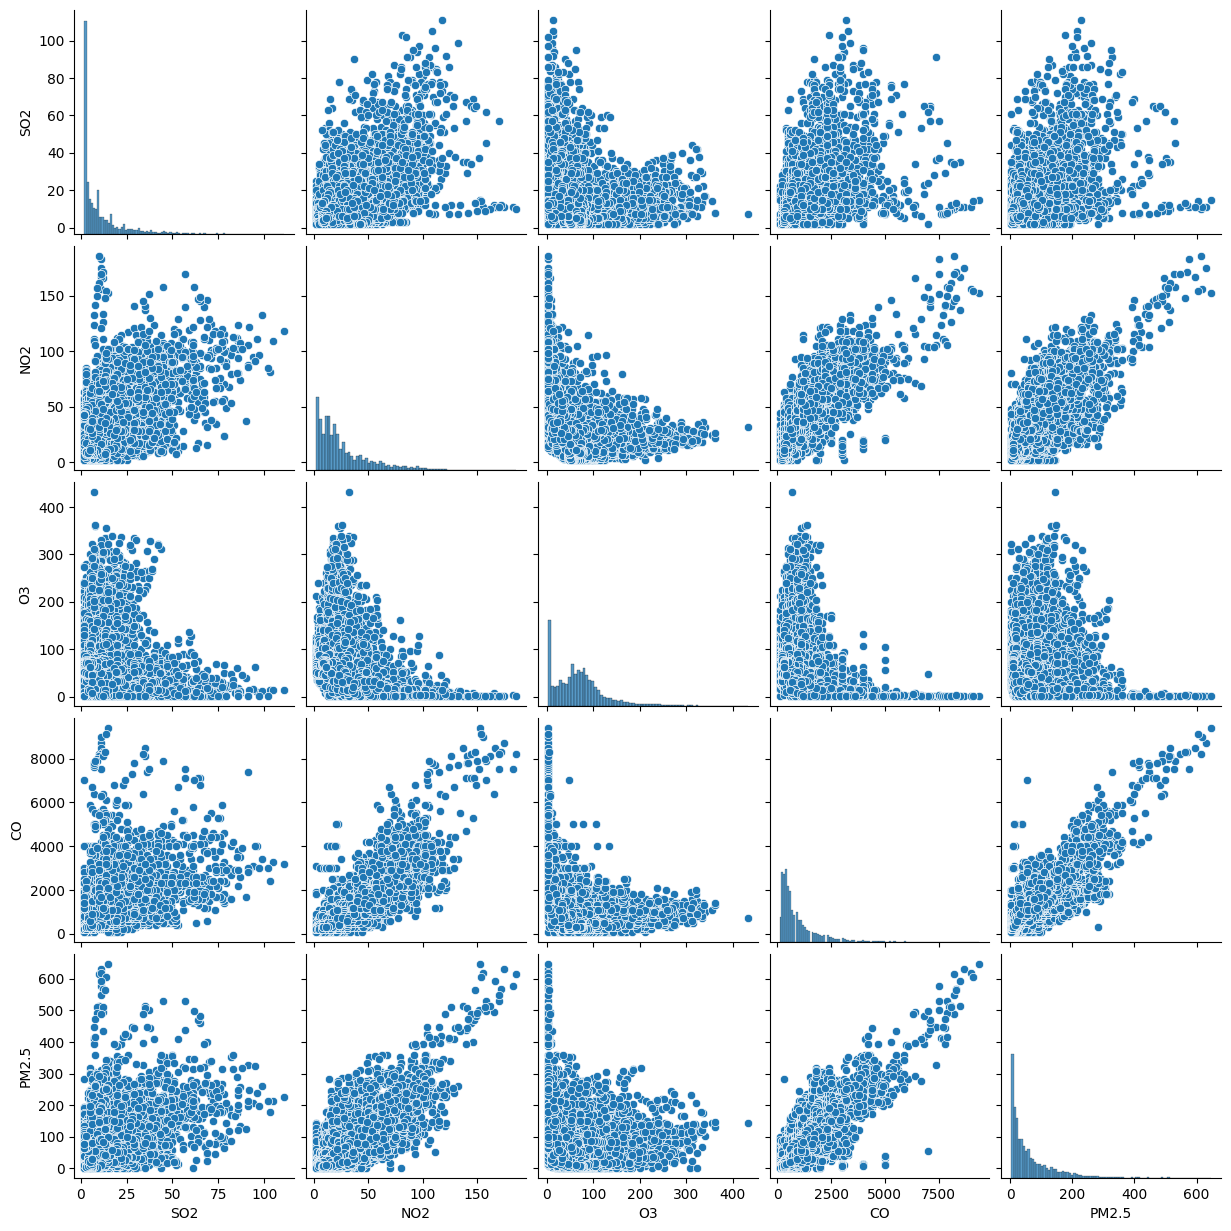

In [ ]:
g= sns.pairplot(ag_df_2015[['SO2', 'NO2', 'O3', 'CO', 'PM2.5']])

In [ ]:
ag_corr=ag_df[['SO2', 'NO2', 'O3', 'CO', 'PM2.5']].corr(method= 'pearson')
ag_corr

SO2       NO2        O3        CO     PM2.5
SO2    1.000000  0.610433 -0.182096  0.529182  0.475117
NO2    0.610433  1.000000 -0.373625  0.798753  0.718170
O3    -0.182096 -0.373625  1.000000 -0.303275 -0.100542
CO     0.529182  0.798753 -0.303275  1.000000  0.802737
PM2.5  0.475117  0.718170 -0.100542  0.802737  1.000000

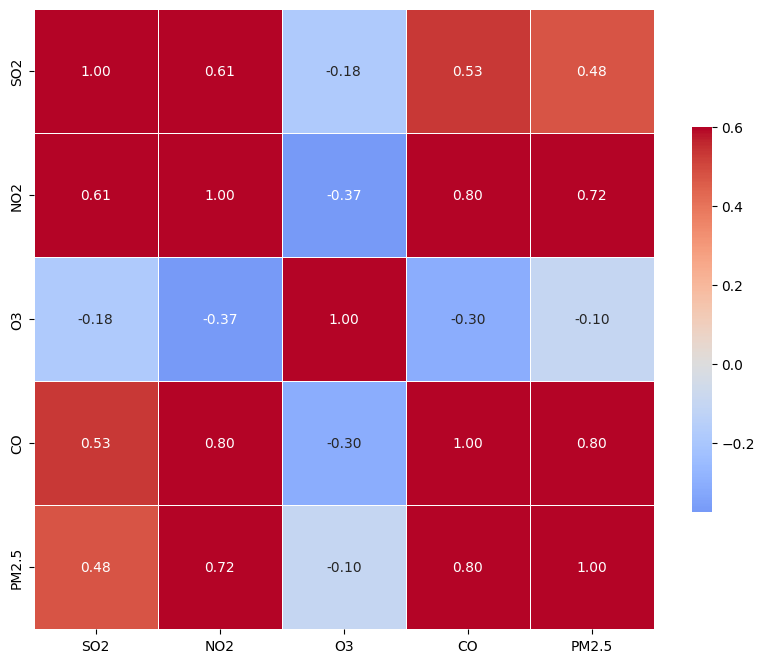

In [ ]:
 g = sns.heatmap(ag_corr, vmax=0.6, center=0,
                 square=True, linewidth=0.5, fmt='0.2f', cbar_kws={'shrink':0.5}, annot=True, cmap='coolwarm')
 g.figure.set_size_inches(10,10)
 plt.show()

In [ ]:
ag_df.groupby('wd').agg(median=('PM2.5', 'median'), mean=('PM2.5', 'mean'), max=('PM2.5', 'max'), min=('PM2.5', 'max')).reset_index()

wd  median       mean    max    min
0     E    70.0  88.623363  434.0  434.0
1   ENE    56.5  77.685514  647.0  647.0
2   ESE    78.5  96.492276  632.0  632.0
3     N    29.0  57.546221  536.0  536.0
4    NE    32.0  57.390083  530.0  530.0
5   NNE    26.0  53.946239  881.0  881.0
6   NNW    33.0  62.790775  548.0  548.0
7    NW    21.0  52.769116  535.0  535.0
8     S    52.0  72.497281  511.0  511.0
9    SE    70.0  85.045709  617.0  617.0
10  SSE    61.0  79.925967  614.0  614.0
11  SSW    50.0  73.078253  493.0  493.0
12   SW    46.0  70.233140  459.0  459.0
13    W    22.0  49.488104  446.0  446.0
14  WNW    14.0  37.307447  515.0  515.0
15  WSW    39.0  66.725926  451.0  451.0

In [ ]:
ag_df_na= ag_df.copy()
ag_df_na = ag_df_na.dropna()
ag_df_na.head()

No  year month day hour  PM2.5  PM10  SO2  NO2     CO  \
datetime                                                                     
2013-03-01 02:00:00   3  2013     3   1    2    5.0   5.0  3.0  2.0  200.0   
2013-03-01 05:00:00   6  2013     3   1    5    6.0   6.0  3.0  4.0  200.0   
2013-03-01 06:00:00   7  2013     3   1    6    5.0  10.0  3.0  4.0  200.0   
2013-03-01 07:00:00   8  2013     3   1    7    5.0   6.0  3.0  2.0  200.0   
2013-03-01 08:00:00   9  2013     3   1    8    8.0   7.0  3.0  3.0  200.0   

                       O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
datetime                                                                  
2013-03-01 02:00:00  79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2  Dingling  
2013-03-01 05:00:00  79.0  -4.5  1022.6 -19.5   0.0  NNW   1.7  Dingling  
2013-03-01 06:00:00  77.0  -4.5  1023.4 -19.5   0.0  NNW   1.8  Dingling  
2013-03-01 07:00:00  80.0  -2.1  1024.6 -20.0   0.0   NW   2.5  Dingling  
2013-03-01 08:00:00  79.0  -0.2  1025.2 -20.5   0.0  NNW   2.8  Dingling

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

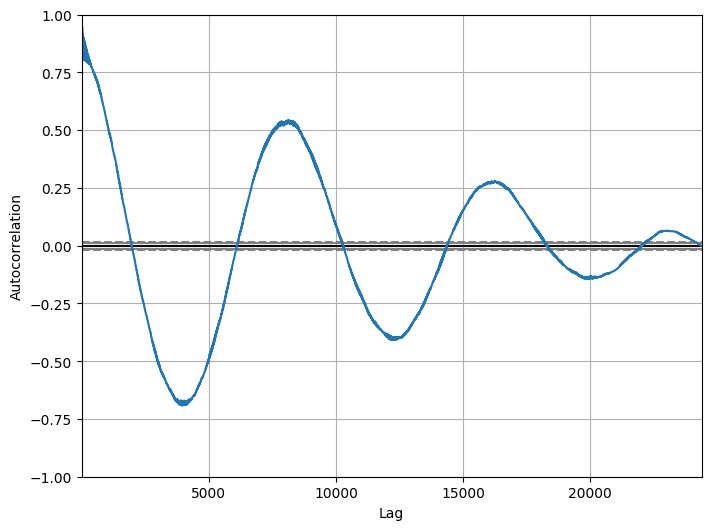

In [ ]:
pd.plotting.autocorrelation_plot(ag_df_na['2014':'2016']['TEMP']) # we see that as lag increases autocorrelation decreases
                                                                  # there is a seasonality in the data

In [ ]:
ag_df_na['TEMP'].resample('1m').mean() # resampling the data on a monthly basis. The .mean() method calculates the mean of data in each monthly interval

datetime
2013-03-31     6.039970
2013-04-30    12.208494
2013-05-31    21.886386
2013-06-30    23.752827
2013-07-31    27.405079
2013-08-31    27.228465
2013-09-30    20.482500
2013-10-31          NaN
2013-11-30     5.434524
2013-12-31     0.896623
2014-01-31     0.023428
2014-02-28    -0.352762
2014-03-31    10.415449
2014-04-30    17.235362
2014-05-31    22.043236
2014-06-30    25.194985
2014-07-31    28.409502
2014-08-31    26.284552
2014-09-30    20.834161
2014-10-31    13.556000
2014-11-30     6.357762
2014-12-31    -0.745582
2015-01-31    -0.590377
2015-02-28     1.572512
2015-03-31     8.707613
2015-04-30    15.566570
2015-05-31    21.300275
2015-06-30    24.636691
2015-07-31    26.228630
2015-08-31    26.135854
2015-09-30    20.392206
2015-10-31    14.387465
2015-11-30     3.358686
2015-12-31    -0.053912
2016-01-31    -4.233428
2016-02-29     1.434441
2016-03-31     8.687006
2016-04-30    16.262014
2016-05-31    20.793142
2016-06-30    25.481977
2016-07-31    25.839216
2016-08

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

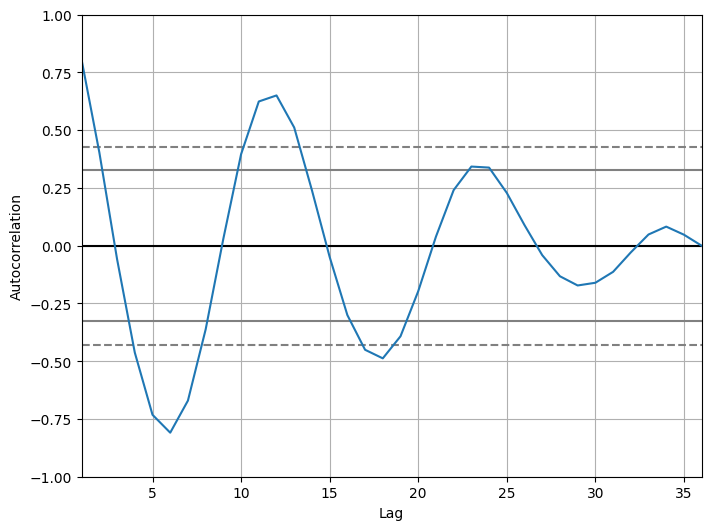

In [ ]:
pd.plotting.autocorrelation_plot(ag_df_na['2014':'2016']['TEMP'].resample('1m').mean()) # the distance between the dotted lines indicates confidence interval

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

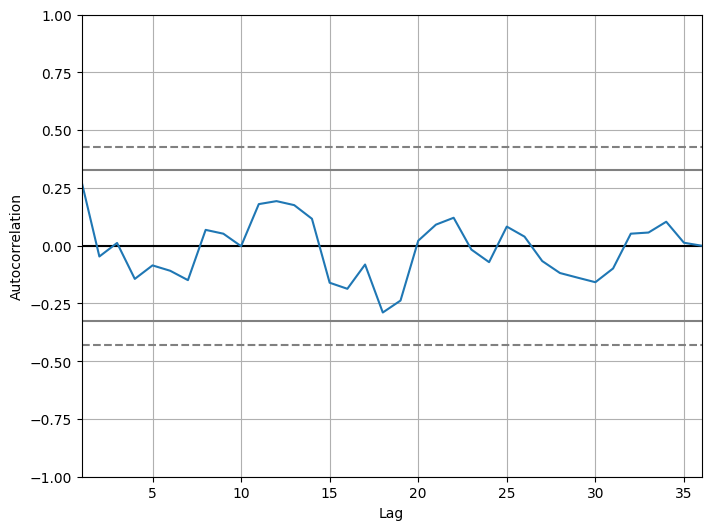

In [ ]:
pd.plotting.autocorrelation_plot(ag_df_na['2014':'2016']['PM2.5'].resample('1m').mean()) # the graph indicates there is no autocorrelationn